In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_printoptions(notebook_repr_html=False)

from pandas import *

import matplotlib as mpl
mpl.rc('figure', figsize=(8, 5))
set_printoptions(max_columns=18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
set_printoptions(notebook_repr_html=False)
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Republican',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Republican',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }
main_cands = ['Obama, Barack', 'Romney, Mitt']
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED'
}

In [2]:
fec = pd.load('data/fec.pickle')
fec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns:
cand_nm              1001731  non-null values
contbr_nm            1001731  non-null values
contbr_st            1001727  non-null values
contbr_employer      994314  non-null values
contbr_occupation    994433  non-null values
contb_receipt_amt    1001731  non-null values
contb_receipt_dt     1001731  non-null values
dtypes: float64(1), object(6)

In [11]:
pd.to_datetime(fec.contb_receipt_dt[:1000])

0    2011-06-20 00:00:00
1    2011-06-23 00:00:00
2    2011-07-05 00:00:00
3    2011-08-01 00:00:00
4    2011-06-20 00:00:00
5    2011-06-23 00:00:00
6    2011-06-21 00:00:00
7    2011-07-05 00:00:00
8    2011-06-21 00:00:00
9    2011-06-20 00:00:00
10   2011-06-22 00:00:00
11   2011-06-22 00:00:00
12   2011-06-21 00:00:00
13   2011-06-27 00:00:00
14   2011-07-11 00:00:00
...
985   2012-02-28 00:00:00
986   2012-02-16 00:00:00
987   2012-02-21 00:00:00
988   2012-02-22 00:00:00
989   2012-02-13 00:00:00
990   2012-02-22 00:00:00
991   2012-02-28 00:00:00
992   2012-02-06 00:00:00
993   2012-02-01 00:00:00
994   2012-02-06 00:00:00
995   2012-02-20 00:00:00
996   2012-03-20 00:00:00
997   2012-02-29 00:00:00
998   2012-02-29 00:00:00
999   2012-02-29 00:00:00
Name: contb_receipt_dt, Length: 1000

In [13]:
fec.contb_receipt_dt[0]

'20-JUN-11'

In [14]:
datetime(2011, 6, 20)

datetime.datetime(2011, 6, 20, 0, 0)

In [3]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
def convert_date(datestr):
    d, m, y = datestr.split('-')
    m = months[m]
    return datetime(int('20' + y), m, int(d))

def convert_date2(datestr):
    return datetime.strptime(datestr, '%d-%b-%y')

fec['contb_receipt_dt'] = fec.contb_receipt_dt.map(convert_date)

In [30]:
import pandas.rpy.common as com
tips = com.load_data('tips', 'reshape2')
tips['tip_pct'] = tips.tip / tips.total_bill
tips

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns:
total_bill    244  non-null values
tip           244  non-null values
sex           244  non-null values
smoker        244  non-null values
day           244  non-null values
time          244  non-null values
size          244  non-null values
tip_pct       244  non-null values
dtypes: float64(3), int64(1), object(4)

In [36]:
tips.pivot_table('tip_pct', rows=['sex', 'smoker'], aggfunc='mean').unstack('smoker')

smoker        No       Yes
sex                       
Female  0.156921  0.182150
Male    0.160669  0.152771

In [40]:
by_date = fec.pivot_table('contb_receipt_amt', 
                          rows='contb_receipt_dt',
                          cols='cand_nm', 
                          aggfunc='sum')
by_date = by_date[['Obama, Barack', 'Romney, Mitt']]
by_date.tail()

cand_nm           Obama, Barack  Romney, Mitt
contb_receipt_dt                             
2012-04-26            537115.38     464335.62
2012-04-27            745269.95     575832.12
2012-04-28            479677.34      64896.50
2012-04-29            349744.69      51038.00
2012-04-30           3499159.38     734803.74

In [51]:
by_date.median()

cand_nm
Obama, Barack    238203.30
Romney, Mitt     119126.52

In [57]:
mby_date = by_date.resample('M', how='sum', kind='period')
mby_date = mby_date.dropna()
mby_date

cand_nm   Obama, Barack  Romney, Mitt
Apr-2011     8220580.79    2028093.13
May-2011     6537807.79    6748735.75
Jun-2011    11642949.35    8251436.77
Jul-2011     3417404.38    2178462.94
Aug-2011     4620007.79    2273631.53
Sep-2011    15165839.38    7432453.25
Oct-2011     5744942.44    3526509.04
Nov-2011     5076100.31    6814234.46
Dec-2011    13416086.82   11118778.00
Jan-2012     7984590.77    5055003.97
Feb-2012    15601893.59   10135619.60
Mar-2012    20582756.19   10812968.67
Apr-2012    15491631.85    8843321.87

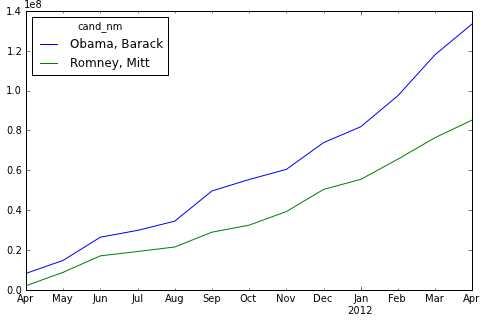

In [58]:
mby_date.cumsum().plot()

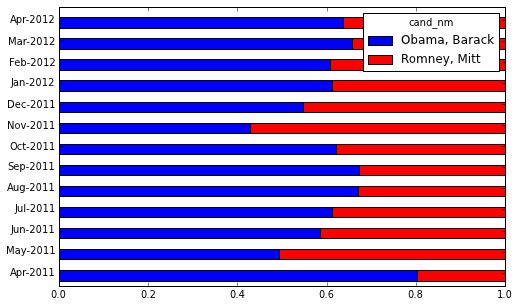

In [61]:
data_normed = mby_date.div(mby_date.sum(1), axis=0)
data_normed.plot(kind='barh', stacked=True)

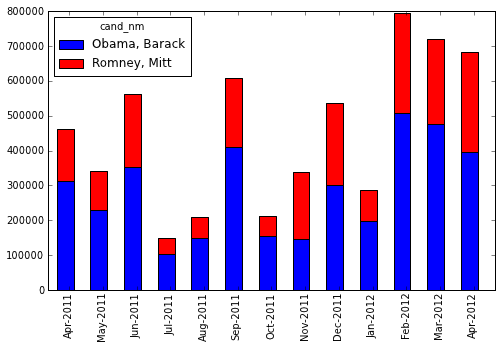

In [54]:
mby_date.plot(kind='bar', stacked=True)

In [ ]:
mby_date

In [63]:
fec.contb_receipt_amt.describe()

count    1001731.000000
mean         298.235150
std         3749.666723
min       -30800.000000
25%           35.000000
50%          100.000000
75%          250.000000
max      2014490.510000

In [84]:
def notimpl(self):
    raise TypeError
Categorical.__hash__ = notimpl

In [5]:
#bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
bins = np.array([0, 1, 10, 100, 1000, 10000])

labels = cut(fec.contb_receipt_amt, bins)
labels

Categorical: contb_receipt_amt
array([(10, 100], (100, 1000], (100, 1000], ..., (1, 10], (10, 100],
       (100, 1000]], dtype=object)
Levels (5): Index([(0, 1], (1, 10], (10, 100], (100, 1000],
                   (1000, 10000]], dtype=object)

In [7]:
fec = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
#fec
fec.groupby([labels, 'cand_nm']).size().unstack('cand_nm')

cand_nm            Obama, Barack  Romney, Mitt
contb_receipt_amt                             
(0, 1]                       493            77
(1, 10]                    40070          3681
(10, 100]                 372280         31853
(100, 1000]               153991         43357
(1000, 10000]              22284         26186

In [12]:
fec.groupby(labels).size()

contb_receipt_amt
(0, 1]                  570
(1, 10]               43751
(10, 100]            404133
(100, 1000]          197348
(1000, 10000]         48470

In [14]:
grouped = fec.groupby([labels, 'cand_nm', 'contb_receipt_dt'])
result = grouped.contb_receipt_amt.sum()
result = result.unstack(['cand_nm', 'contb_receipt_amt'])
result.ix[0]

cand_nm        contb_receipt_amt
Obama, Barack  (0, 1]                     NaN
Romney, Mitt   (0, 1]                     NaN
Obama, Barack  (1, 10]                 612.00
Romney, Mitt   (1, 10]                    NaN
Obama, Barack  (10, 100]             72908.12
Romney, Mitt   (10, 100]                  NaN
Obama, Barack  (100, 1000]          310275.00
Romney, Mitt   (100, 1000]                NaN
Obama, Barack  (1000, 10000]        264690.00
Romney, Mitt   (1000, 10000]              NaN
Name: 2011-04-04 00:00:00

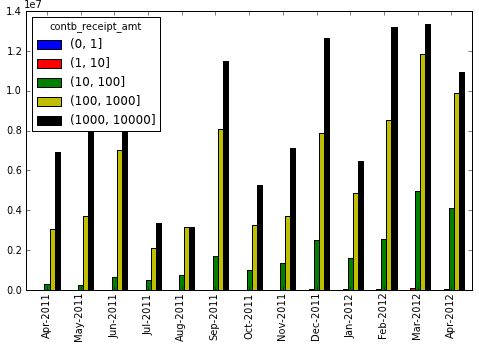

In [11]:
result.resample('M', how='sum', kind='period').plot(kind='bar')

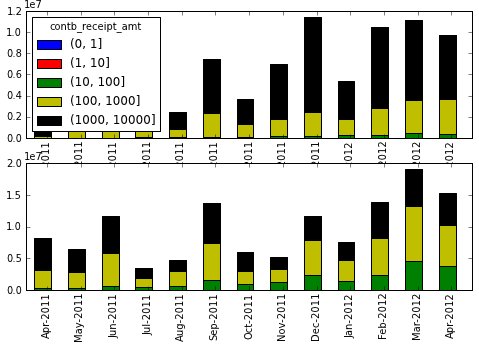

In [18]:
result = result.resample('M', how='sum', kind='period')
mitt = result['Romney, Mitt']
barack = result['Obama, Barack']
fig, axes = plt.subplots(nrows=2, ncols=1)
mitt.plot(kind='bar', stacked=True, ax=axes[0])
barack.plot(kind='bar', stacked=True, ax=axes[1], legend=False)
